## 보스턴 주택 가격 예측하기

- 회귀(regression): 연속적인 값의 예측
- 보스턴 주택 가격 데이터셋 -> 1970년대 보스턴 지역의 범죄율, 토지 지역의 비율, 방의 개수 등 총 14개의 변수가 포함됨.

### 패키지 참조 및 데이터 준비

In [1]:
from tensorflow.keras.datasets.boston_housing import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split

from pandas import DataFrame

import numpy as np

In [2]:
# 데이터 다운받기
(x_train, y_train), (x_test, y_test) = load_data(path = 'boston_housing.npz', 
                                                test_split = 0.33, seed = 777)

In [3]:
# 데이터 크기 확인하기
# 학습데이터와 학습 label의 크기
print(x_train.shape, y_train.shape)

(339, 13) (339,)


In [4]:
# 검증 데이터와 검증 label의 크기
print(x_test.shape, y_test.shape)

(167, 13) (167,)


### label 데이터 확인

In [5]:
# 주택 가격의 중간 가격($1,000 단위)를 의미함.
DataFrame(y_train)

,0
0,22.5
1,8.3
2,17.2
3,25.0
4,28.5
...,...
334,21.9
335,21.8
336,34.9
337,25.0


### 학습 데이터 확인
- 총 13개의 특성을 갖는 데이터셋
- 각 특성마다 데이터의 범위(스케일)가 다르다.
    - 범죄율 : 0 ~ 1
    - 방의 개수 : 3 ~ 9

In [6]:
DataFrame(x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.20608,22.0,5.86,0.0,0.4310,5.593,76.5,7.9549,7.0,330.0,19.1,372.49,12.50
1,0.01951,17.5,1.38,0.0,0.4161,7.104,59.5,9.2229,3.0,216.0,18.6,393.24,8.05
2,3.67822,0.0,18.10,0.0,0.7700,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19
3,0.63796,0.0,8.14,0.0,0.5380,6.096,84.5,4.4619,4.0,307.0,21.0,380.02,10.26
4,0.04294,28.0,15.04,0.0,0.4640,6.249,77.3,3.6150,4.0,270.0,18.2,396.90,10.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,0.07151,0.0,4.49,0.0,0.4490,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44
163,12.04820,0.0,18.10,0.0,0.6140,5.648,87.6,1.9512,24.0,666.0,20.2,291.55,14.10
164,0.10328,25.0,5.13,0.0,0.4530,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22
165,0.10000,34.0,6.09,0.0,0.4330,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86


### 데이터 표준화 수행
- 스케일이 서로 다를 경우 신경망의 성능에 큰 영향을 주기 때문에 표준화를 수행해야 한다.
- 표준화 -> 각 값에 대해 특성(DF의 컬럼)의 평균을 때고 표준편차로 나누는 처리
- 표준화는 특성의 평균을 0으로, 표준편차를 1로 만들어준다.

In [7]:
# 평균 구하기
mean = np.mean(x_train, axis = 0)

In [8]:
# 표준편차 구하기
std = np.std(x_train, axis = 0)

In [9]:
# 학습 데이터 표준화
std_x_train = (x_train - mean) / std

# 검증 데이터 표준화
std_x_test = (x_test - mean) / std

In [10]:
# 학습데이터 표준화 확인
DataFrame(std_x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.398157,-0.493015,-0.114676,-0.311588,-0.572882,-0.714780,0.135436,0.258581,-0.637411,-0.789973,0.107780,0.384607,0.703446
1,1.352052,-0.493015,0.970928,-0.311588,0.994262,-0.554323,0.939305,-0.871380,1.641939,1.518963,0.834895,-3.607039,1.563816
2,0.403808,-0.493015,0.970928,-0.311588,0.317915,-0.950494,1.027837,-1.081587,1.641939,1.518963,0.834895,-0.397411,1.837015
3,-0.412229,0.556941,-0.903942,-0.311588,-0.869815,0.675368,-0.902158,1.934138,-0.181541,-0.748424,0.607672,0.448912,-0.460025
4,-0.422487,2.866843,-0.929962,-0.311588,-1.216236,0.815945,-1.451056,0.610605,-0.637411,-0.979912,0.380448,0.462715,-1.298649
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,-0.421010,2.866843,-1.119328,-0.311588,-1.372951,-0.253290,-1.305864,2.506859,-0.979314,-0.564422,-0.892003,0.420785,-0.858270
335,-0.110380,-0.493015,0.970928,-0.311588,-0.218213,-0.744599,-1.011938,0.140008,1.641939,1.518963,0.834895,0.421099,-0.334980
336,-0.422647,2.656852,-1.219071,-0.311588,-1.076018,1.047399,-1.879550,0.742025,-0.751379,-0.938363,-0.028554,0.449331,-1.482140
337,0.216240,-0.493015,0.970928,-0.311588,-0.218213,1.099938,0.287710,-0.177775,1.641939,1.518963,0.834895,0.445776,-0.798465


In [11]:
# 검증 데이터 표준화 확인
DataFrame(std_x_test)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.403305,0.430946,-0.798418,-0.311588,-1.051274,-0.984573,0.270004,1.922124,-0.295509,-0.475388,0.335004,0.207479,-0.052267
1,-0.424226,0.241954,-1.446021,-0.311588,-1.174171,1.160997,-0.332013,2.508060,-0.751379,-1.152043,0.107780,0.424445,-0.657109
2,-0.013963,-0.493015,0.970928,-0.311588,1.744841,-1.312586,0.967635,-0.781733,1.641939,1.518963,0.834895,0.294266,-0.366241
3,-0.354877,-0.493015,-0.468834,-0.311588,-0.168724,-0.270330,0.553306,0.308026,-0.637411,-0.611906,1.198453,0.286214,-0.356727
4,-0.421599,0.682936,0.528591,-0.311588,-0.779085,-0.053075,0.298334,-0.083323,-0.637411,-0.831522,-0.073998,0.462715,-0.311873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,-0.418395,-0.493015,-0.996457,-0.311588,-0.902807,-0.234831,-0.427627,-0.022049,-0.751379,-0.968040,0.062336,0.444416,-0.604100
163,0.924589,-0.493015,0.970928,-0.311588,0.458134,-0.906475,0.663086,-0.852157,1.641939,1.518963,0.834895,-0.638844,0.165204
164,-0.414832,0.556941,-0.903942,-0.311588,-0.869815,-0.510304,-0.767590,1.449447,-0.181541,-0.748424,0.607672,0.462715,-0.498083
165,-0.415200,0.934925,-0.765170,-0.311588,-1.034777,0.987761,-1.812266,0.783891,-0.295509,-0.481324,-1.028337,0.395063,-1.090692


### 검증 데이터셋 만들기

In [12]:
re_x_train, re_x_val, re_y_train, re_y_val = train_test_split(std_x_train, y_train,
                                                             test_size = 0.33,
                                                             random_state = 777)

### 모델 구성하기
- 데이터가 단순하고 개수가 적다면 과대적합이 발생할 확률이 높기 때문에 주의하면서 적절한 크기의 모델층을 쌓아야 한다.

In [13]:
model = Sequential()

In [14]:
# 13차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫 번째 Dense층
model.add(Dense(64, activation = 'relu', input_shape = (13, )))

In [15]:
# 32개의 출력을 가지는 Dense층
model.add(Dense(32, activation = 'relu'))

In [16]:
# 하나의 값을 출력
# -> 정답의 범위가 정해지지 않기 때문에 활성화 함수는 linear
# -> linear는 기본값이므로 생략 가능함
model.add(Dense(1, activation = 'linear'))

### 학습 과정 설정
- 손실 함수는 회귀 문제에서 보편적으로 사용되는 평균제곱오차(mse)를 적용 -> 정답과 예측값 사이 거리의 제곱
- 평가지표 mae -> Mean Absolute Error
    - 모델의 예측값과 실제값의 차이를 모두 더한 값. 절대값을 취하기 때문에 가장 ㅈ기관적으로 알 수 있는 지표이다.

In [17]:
model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

### 학습하기

In [18]:
from tensorflow.keras.callbacks import TensorBoard
tensorboard_callback = TensorBoard(log_dir = './logs')

result = model.fit(re_x_train, re_y_train,
                  epochs = 300,
                  validation_data = (re_x_val, re_y_val),
                  callbacks = [tensorboard_callback])

Epoch 1/300
1/8 [==>...........................] - ETA: 0s - loss: 531.5999 - mae: 21.7478WARNING:tensorflow:From c:\users\ezen\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
8/8 [==============================] - 0s 25ms/step - loss: 622.0352 - mae: 23.0473 - val_loss: 499.6153 - val_mae: 20.7218
Epoch 2/300
8/8 [==============================] - 0s 4ms/step - loss: 599.1518 - mae: 22.5582 - val_loss: 477.8882 - val_mae: 20.2149
Epoch 3/300
8/8 [==============================] - 0s 4ms/step - loss: 576.0115 - mae: 22.0624 - val_loss: 455.3818 - val_mae: 19.6812
Epoch 4/300
8/8 [==============================] - 0s 4ms/step - loss: 550.5601 - mae: 21.4988 - val_loss: 428.8926 - val_mae: 19.0439
Epoch 5/300
8/8 [==============================] - 0s 4ms/step - loss: 

### 학습 결과 DataFrame 생성하기

In [19]:
result_df = DataFrame(result.history)
# 이 데이터를 시각화하거나 엑셀이나 DataBase에 저장 가능함
result_df

,loss,mae,val_loss,val_mae
0,622.035217,23.047344,499.615326,20.721758
1,599.151794,22.558212,477.888184,20.214918
2,576.011475,22.062395,455.381836,19.681227
3,550.560120,21.498768,428.892578,19.043884
4,519.557007,20.803839,397.513245,18.260839
...,...,...,...,...
295,4.466212,1.572620,13.335040,2.525692
296,4.566384,1.584981,13.332957,2.493392
297,4.609705,1.590012,13.498895,2.539761
298,4.488736,1.594763,13.309138,2.532018


### 학습 결과 그려보기

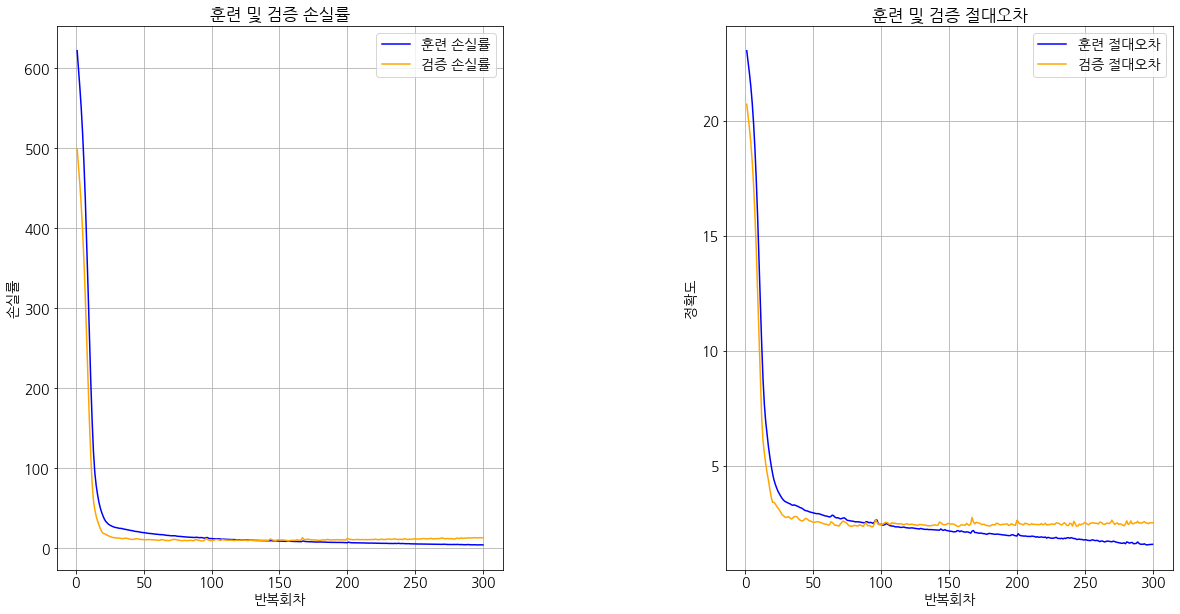

In [20]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (20, 10)

# 그래프를 그리기 위한 객체 생성
fig = plt.figure()
fig.subplots_adjust(wspace = 0.5, hspace = 0.5)

# 1) 훈련 및 검증 손실 그리기

# 훈련 손실률(y축)
loss = result.history['loss']
# 검증 손실률(y축)
val_loss = result.history['val_loss']

# 학습회차 (1부터 길이+1 전까지) --> x축으로 사용
epochs = range(1, len(loss) + 1)

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = '훈련 손실률')
ax1.plot(epochs, val_loss, color = 'orange', label = '검증 손실률')
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 절대오차 그리기

# 훈련 절대오차(y축)
acc = result.history['mae']

# 검증 절대오차(y축)
val_acc = result.history['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = '훈련 절대오차')
ax2.plot(epochs, val_acc, color = 'orange', label = '검증 절대오차')
ax2.set_title('훈련 및 검증 절대오차')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()

### 모델 평가하기

In [21]:
model.evaluate(std_x_test, y_test)

6/6 [==============================] - 0s 997us/step - loss: 10.1811 - mae: 2.3485


[10.181051254272461, 2.3484790325164795]

### 출력결과 예시

- 최종 점수로 2를 얻음.
- 실제 가격과 예측 가격이 평균적으로 $2,000의 차이를 보임을 의미함. -> 신경망의 가중치는 PC에 따라 무차별적으로 다르기 때문에 결과값의 차이가 클 수 있다. 무시하고 진행해도 좋다.

### 모델 확인하기

- 표준화된 주택 데이터를 사용하여 예측 데이터 생성 -> 여기서 생성된 데이터와 실제 집값(y_test)를 비교한다.

In [22]:
test_predictions = model.predict(std_x_test).flatten()

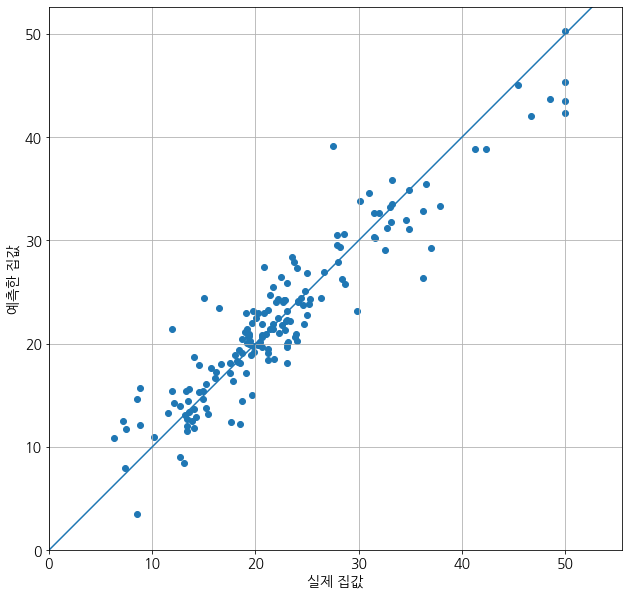

In [23]:
plt.scatter(y_test, test_predictions)
plt.xlabel('실제 집값')
plt.ylabel('예측한 집값')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
plt.grid()
plt.plot([-100, 100], [-100, 100])  # 추세선을 임의로 설정함
plt.show()

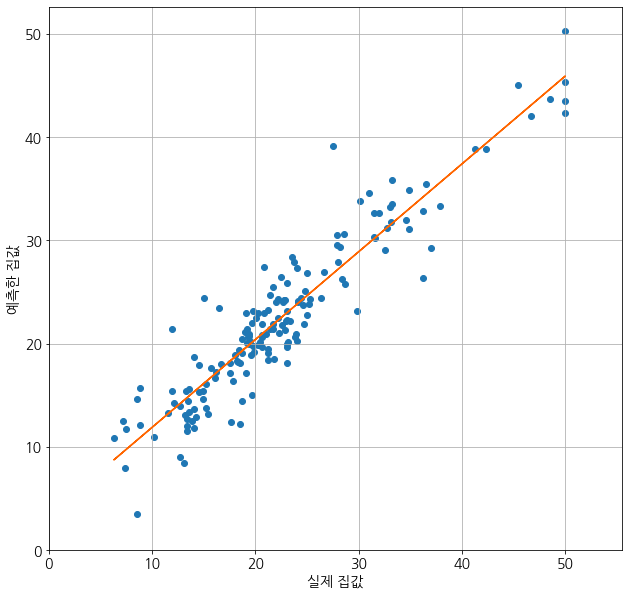

In [24]:
# 추세선을 위해 실제 집값을 x축, 예측 집값을 y축으로 하는 1차 polynomial(다항식)을 세운다.
z = np.polyfit(y_test, test_predictions, 1)

# 1차원 다항식에 대한 연산을 캡슐화
f = np.poly1d(z)

# 추세선 포함 그래프 다시 그리기
plt.scatter(y_test, test_predictions)
plt.xlabel('실제 집값')
plt.ylabel('예측한 집값')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
plt.grid()
plt.plot(y_test, f(y_test), '#ff6600')
plt.show()

### 오차 분포에 대한 히스토그램

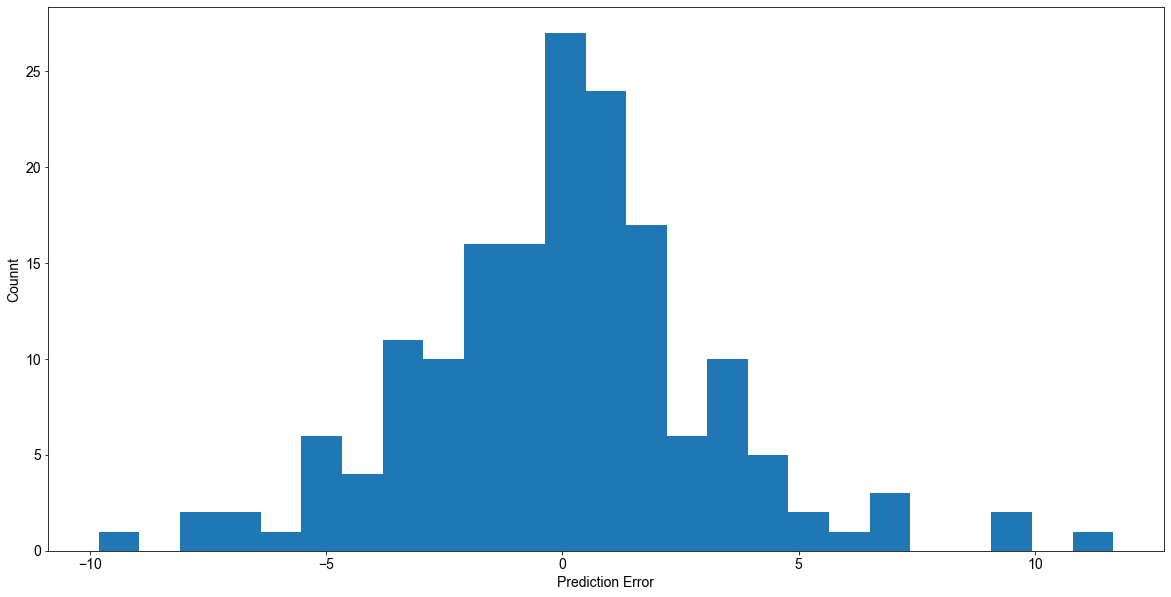

In [25]:
plt.rcParams['font.family'] = 'Arial'

error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel('Prediction Error')
plt.ylabel('Counnt')
plt.show()

- 표준 정규 분포 = 가우시안 분포를 따른다.